## Welcome to Day 11 Hands On!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Part 1: Importing Data

Dalam kebanyakan tugas Data Science, file biasanya dikemas dalam format .csv, dan import file dilakukan dengan menulis `pd.read_csv(<nama_file.csv>)`. 

In [2]:
df = pd.read_csv('telco_customer_churn.csv')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Namun, selain `csv`, terdapat banyak sekali tipe data lain yang dapat di-import oleh `pandas`, seperti:
- .xslx (file Excel)
- .parquet (file type berbasis Apache Parquet yang sangat efficient dalam menyimpan data, sehingga memiliki ukuran yang kecil)

Untuk menambah wawasan, mari kita coba menyimpan file `telco_customer_churn.csv` ini ke dalam format Excel dan Parquet, dan bandingkan ukuran file nya. 

In [5]:
df.to_excel('telco_customer_churn.xlsx')

In [7]:
df.to_parquet('telco_customer_churn.parquet')

Jika kedua langkah di atas telah dijalankan, seharusnya di folder local tempat teman-teman menyimpan file, sudah terdapat 3 file dengan nama yang sama (telco_customer_churn) namun dengan 'extension' yang berbeda-beda. 

- File .csv memiliki ukuran sekitar 900 KB
- File .xlsx memiliki ukuran sekitar 600-700 KB
- File .parquet memiliki ukuran sekitar 200 KB

Hal ini konsisten dengan apa yang akan teman-teman hadapi di 'dunia kerja' nanti. 
- File .csv bisa dibuka oleh banyak software (karena pada dasarnya file .csv adalah file teks, dan dapat dibuka oleh Notepad), namun cenderung memiliki ukuran yang besar
- File .xlsx hanya bisa dibuka oleh Microsoft Excel (dan Google Spreadsheet) serta beberapa program pengolah data lainnya
- File .parquet tidak bisa dibuka oleh program-program pengolah data atau text editor konvensional, namun sangat baik dalam menekan ukuran file, sehingga untuk data yang sama, ukuran file .parquet jauh lebih kecil (bisa sampai 2-3x) daripada jika file tersebut disimpan dalam format .csv ataupun .xlsx

Jika teman-teman bekerja dengan Stakeholder lain (yang bukan merupakan anggota tim data), maka sangat dianjurkan untuk saling mengirim file dalam format yang lazim (.csv atau .xlsx). Namun, jika teman-teman ingin sharing file di antara sesama Data Scientists, maka dianjurkan untuk menyimpan file dalam format .parquet sehingga cepat untuk disimpan dan dibuka, serta menghemat ukuran. 

In [3]:
df_parq = pd.read_parquet('telco_customer_churn.parquet')

In [11]:
df_exc = pd.read_excel('telco_customer_churn.xlsx')

### Part 2: Checking Column Types

Langkah ini terbilang sepele namun sangat penting sebenarnya. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Data Type 'object' berarti kolom tersebut berisi 'string' (teks). Data type 'int64' berarti kolom tersebut berisi bilangan bulat, tanpa desimal. Selain itu, data type 'float64' berarti kolom tersebut berisi bilangan desimal. 

Sekilas, sepertinya dataset kita baik-baik saja. Semua kolom tidak memiliki `missing value` (Jika ada missing value, pasti ada kolom yang tidak tertulis 7043 non-null). Namun, jika melihat lebih dalam, kolom `TotalCharges` yang seharusnya merupakan obyek `float64` (karena merupakan angka), tercatat sebagai `object`. Ini mesti diperbaiki.

In [9]:
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

Cara memperbaikinya adalah dengan menjadikan tipe sebagai `float64`.

In [12]:
df['TotalCharges'].astype('float64')

ValueError: could not convert string to float: 

Ternyata, terdapat error yang menyatakan tidak bisa mengkonversi `string` menjadi `float`. Berarti, di antara 7043 data tersebut, ada beberapa row yang memiliki `TotalCharges` sebagai `string`. Tugas kita adalah mencarinya.

In [13]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

Langkah di atas artinya memaksa untuk mengubah semua anggota `TotalCharges` ke dalam numerik. Jika error, maka dia akan diubah menjadi `Null`. 

In [15]:
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Terdapat 11 row yang sekarang menunjukkan adanya `Null` atau `missing value` di kolom `TotalCharges`. Ada hal yang janggal - kok `tenure`-nya 0? Tenure = 0 berarti customer tersebut memiliki durasi keanggotaan sebanyak 0 bulan...Berarti belum pernah membayar sama sekali.

In [16]:
df[df['TotalCharges'].isnull()]['MonthlyCharges']

488     52.55
753     20.25
936     80.85
1082    25.75
1340    56.05
3331    19.85
3826    25.35
4380    20.00
5218    19.70
6670    73.35
6754    61.90
Name: MonthlyCharges, dtype: float64

Namun mereka memiliki `MonthlyCharges`. Mereka memiliki tagihan per bulan. Apa ini berarti bulan pertama mereka? Hal ini janggal. 

Bisa dibilang bahwa ini adalah `missing value` yang diketemukan akibat kita melakukan `column profiling`. 

Kalau ini terjadi di dunia kerja, biasanya yang kita lakukan adalah menanyakan langsung ke stakeholdernya, mengapa ada yang `tenure`-nya 0, tapi sudah ada `MonthlyCharges`. Namun, ketika kita melakukan personal project tanpa informasi lebih lanjut ke sumber data, maka kita dapat menghilangkannya (karena datanya tidak make sense). 

Dealing with `missing values` akan dibahas lebih lanjut di pertemuan berikutnya. `

In [18]:
df = df[df['tenure'] != 0].reset_index(drop = True)

### Part 3: Correlation Analysis

Correlation analysis adalah analisis hubungan dua variabel. Apabila ditemukan korelasi yang kuat, berarti kedua variabel memiliki hubungan yang erat. Contohnya: terangnya matahari dengan temperatur (suhu), dst. 

Biasanya terdapat dua jenis analisis korelasi, Pearson dan Spearman. 

Pearson Correlation memperhitungkan hubungan `linear` kedua variabel, sedangkan Spearman Correlation memperhitungkan hubungan `monotonic` kedua variabel.

Mari kita belajar lebih dalam lagi tentang dua perbedaan korelasi tersebut dengan sekilas membahas artikel ini: https://towardsdatascience.com/clearly-explained-pearson-v-s-spearman-correlation-coefficient-ada2f473b8 

In [19]:
### Korelasi Pearson tenure dan MonthlyCharges

df['tenure'].corr(df['MonthlyCharges'], 'pearson')

0.24686176664089352

In [20]:
df['tenure'].corr(df['MonthlyCharges'], 'spearman')

0.2753387429197595

In [22]:
df.corr('spearman')

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.017408,0.220737,0.107248
tenure,0.017408,1.000000,0.275339,0.889177
MonthlyCharges,0.220737,0.275339,1.000000,0.638032
TotalCharges,0.107248,0.889177,0.638032,1.000000


Dapat dilihat bahwa dua variabel yang memiliki korelasi tinggi adalah `TotalCharges` dan `tenure`. Hal ini make sense karena, semakin lama customer berlangganan, maka semakin tinggi pula total nominal yang mereka telah bayarkan. 

Mengapa kolom-kolom lain tidak nampak dalam tabel korelasi? Karena kolom-kolom lain bukan merupakan kolom `numerik`. Agar bisa dibandingkan, maka kolom-kolom tersebut harus di-encode menjadi kolom-kolom numerik terlebih dahulu. Hal ini akan dibahas di pertemuan berikut.

### Part 4: Basic Visualization

Ya, kita sudah menghabiskan 2 pertemuan untuk belajar visualisasi. Jadi, untuk apa kita belajar visualisasi lagi? 

Ketika melakukan visualisasi dalam EDA, apalagi ingin mem-present data ke stakeholder, terkadang kita perlu memikirkan lebih tentang desain visualisasi tersebut. Hal ini dapat dimudahkan dengan menuliskan `function` yang dapat meng-automate visualisasi kita. 

Seperti apa contohnya?

In [26]:
def vis_univar(data, column):
    sns.color_palette("pastel")
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {'height_ratios':(.2, .8)})
    
    sns.boxplot(data = df, x = column, ax = ax_box)
    sns.histplot(data = df, x = column, ax = ax_hist)
    
    ax_box.set(xlabel = '')
    ax_hist.set(ylabel = 'Histogram (Count)')
    
    plt.show()

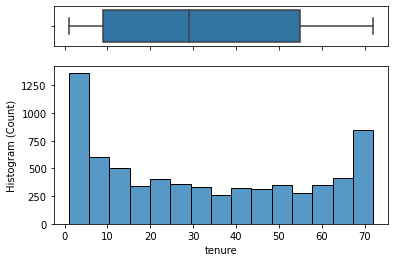

In [27]:
vis_univar(df, 'tenure')

Tidak apa-apa sih, melakukan visualisasi secara terpisah. Boxplot dulu, baru histogram. Namun, akan lebih baik dan lebih komprehensif jika kita bisa menggabungkannya ke dalam satu buah plot, sehingga dapat terlihat dengan lebih jelas 'sekaligus', dan lebih 'estetik'. Selain itu, dengan merangkumnya ke dalam satu buah function, kita hanya perlu memanggil function itu saja ketika ingin melakukan visualisasi pada kolom numerik lainnya.

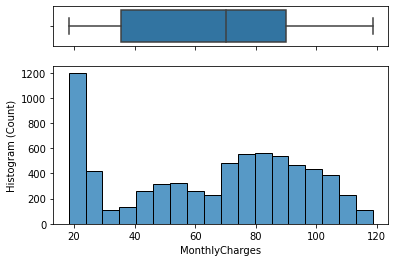

In [28]:
vis_univar(df, 'MonthlyCharges')

In [39]:
def vis_univar(data, column):
    sns.color_palette("pastel")
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {'height_ratios':(.2, .8)})
    
    sns.boxplot(data = df, x = column, ax = ax_box, y = 'Churn')
    sns.histplot(data = df, x = column, ax = ax_hist, hue = 'Churn')
    
    ax_box.set(xlabel = '')
    ax_hist.set(ylabel = 'Histogram (Count)')
    
    plt.show()

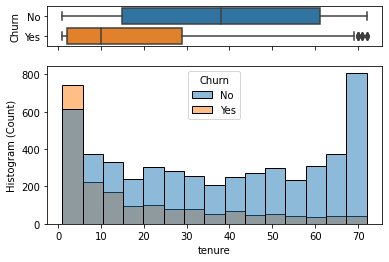

In [40]:
vis_univar(df, 'tenure')